# Variational autoencoders with Tensorflow <a class="tocSkip">

[Tomas Beuzen](https://tomasbeuzen.github.io/) (April 2020)
    
---    

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Variational-Autoencoder-(VAE)" data-toc-modified-id="Variational-Autoencoder-(VAE)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variational Autoencoder (VAE)</a></span><ul class="toc-item"><li><span><a href="#Custom-functions" data-toc-modified-id="Custom-functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Custom functions</a></span></li><li><span><a href="#VAE-model-set-up" data-toc-modified-id="VAE-model-set-up-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>VAE model set up</a></span></li><li><span><a href="#Train-the-VAE" data-toc-modified-id="Train-the-VAE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Train the VAE</a></span></li><li><span><a href="#Visualize-VAE-fit-and-results" data-toc-modified-id="Visualize-VAE-fit-and-results-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualize VAE fit and results</a></span><ul class="toc-item"><li><span><a href="#Visualize-the-latent-space" data-toc-modified-id="Visualize-the-latent-space-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Visualize the latent space</a></span></li><li><span><a href="#Generate-a-random-image" data-toc-modified-id="Generate-a-random-image-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Generate a random image</a></span></li><li><span><a href="#Generate-a-random-image-of-a-specific-digit" data-toc-modified-id="Generate-a-random-image-of-a-specific-digit-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Generate a random image of a specific digit</a></span></li><li><span><a href="#Generate-a-random-image-by-interpolating-between-specific-digits" data-toc-modified-id="Generate-a-random-image-by-interpolating-between-specific-digits-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Generate a random image by interpolating between specific digits</a></span></li></ul></li><li><span><a href="#Using-more-latent-dimensions" data-toc-modified-id="Using-more-latent-dimensions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Using more latent dimensions</a></span></li><li><span><a href="#Improving-the-model" data-toc-modified-id="Improving-the-model-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Improving the model</a></span></li></ul></li><li><span><a href="#Convolutional-Variational-Autoencoder-(CVAE)" data-toc-modified-id="Convolutional-Variational-Autoencoder-(CVAE)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convolutional Variational Autoencoder (CVAE)</a></span><ul class="toc-item"><li><span><a href="#CVAE-model-set-up" data-toc-modified-id="CVAE-model-set-up-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CVAE model set up</a></span></li><li><span><a href="#Train-the-CVAE" data-toc-modified-id="Train-the-CVAE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train the CVAE</a></span></li><li><span><a href="#Visualize-CVAE-fit-and-results" data-toc-modified-id="Visualize-CVAE-fit-and-results-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualize CVAE fit and results</a></span><ul class="toc-item"><li><span><a href="#Visualize-the-latent-space" data-toc-modified-id="Visualize-the-latent-space-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Visualize the latent space</a></span></li><li><span><a href="#Generate-a-random-image" data-toc-modified-id="Generate-a-random-image-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Generate a random image</a></span></li><li><span><a href="#Generate-a-random-image-of-a-specific-digit" data-toc-modified-id="Generate-a-random-image-of-a-specific-digit-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Generate a random image of a specific digit</a></span></li></ul></li><li><span><a href="#Using-more-latent-dimensions" data-toc-modified-id="Using-more-latent-dimensions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Using more latent dimensions</a></span></li></ul></li><li><span><a href="#Conditional-Convolutional-Autoencoder-(CCVAE)" data-toc-modified-id="Conditional-Convolutional-Autoencoder-(CCVAE)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conditional Convolutional Autoencoder (CCVAE)</a></span></li></ul></div>

# Introduction

In the [autoencoder tutorial](./autoencoders.ipynb) we looked at simple applications of autoencoders (AEs) for:
- Dimensionality reduction
- Image reconstruction
- Noise removal

We'll now look at using AEs to generate *new* images. Standard AEs don't work well for generating new images. While it would be possible to feed in some noisey input to the decoder and get an image as an output, there's no guarantee that the output will look anything like any of the images the network was trained on

What we really need for image generation is a way of ensuring that the decoder will produce a reaonable image for any give input, enter *variational autoencoder*. In simplest terms, VAEs don't just learn to deconstruct/reconstruct data in and out of a reduced dimensionality, but they learn the parameters of the probability distribution that the data came from. We can then sample from this distribution to generate new images.

We'll be exploring three types of VAE here:
1. Vanilla VAE
2. Convolutional VAE
3. Conditional Convolutional VAE

If you want to read more about VAEs, the following resources are excellent:
- [Building autoencoders in Keras, blog.keras.io](https://blog.keras.io/building-autoencoders-in-keras.html)
- [Variational Autoencoder: Intuition and Implementation, https://wiseodd.github.io/](https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/)
- [Conditional Variational Autoencoders, ijdykeman.github.io](https://ijdykeman.github.io/ml/2016/12/21/cvae.html)

We'll be demonstrating each VAE on the MNIST digits dataset because it is a simple and useful dataset for demonstrating key concepts. At the end we'll look at a cool application of generating new pokemon from a dataset of pokemon images! Code in this tutorial is adapted from the [Building autoencoders in Keras GitHub repo](https://github.com/keras-team/keras/tree/master/examples).

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import axes3d
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Lambda, Input, Dense, Conv2D, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

# Variational Autoencoder (VAE)

- As with a standard AE, a VAE is composed of an encoder, decoder and autoencoder
- However, rather than just learning some arbitrary mapping functions from input -> reduced dimensionality -> output, we are trying to learn the parameters of a probability distribution of our data. If we can do this, then we can sample points from the distribution to generate new data!
- Briefly, and paraphrasing [this Keras blog post](https://blog.keras.io/building-autoencoders-in-keras.html), in a VAE the encoder first transforms input data into two parameters in a latent space, which are the parameters of our probability distribution. Then, we randomly sample similar points to our input data from the latent normal distribution that is assumed to generate the data. Finally, a decoder network maps these latent space points back to the original input data.

## Custom functions

- Here I'll define some custome functions to use throughout the notebook

In [2]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 batch_size=128):
    """Plots labels and MNIST digits as a function of the 2D latent vector
    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data

    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-5, 5, n)
    grid_y = np.linspace(-5, 5, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

## VAE model set up

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 64
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

# build model
models = (encoder, decoder)
data = (x_test, y_test)

# VAE loss = mse_loss or xent_loss + kl_loss
# reconstruction_loss = mse(inputs, outputs)
reconstruction_loss = binary_crossentropy(inputs,
                                          outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
# vae.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense[0][0]                      
____________________________________________________________________________________________

## Train the VAE

- I've already trained the model and saved the weight of the model which we will load in the next cell
- But you can train the model from scratch if you like

In [5]:
# load pre-trained weights
url = './checkpoints/vae_2L/vae_2L'
vae.load_weights(url);
models = (vae.get_layer('encoder'),
          vae.get_layer('decoder'))

# OR, fit from scratch
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# vae.fit(x_train,
#         epochs=epochs,
#         batch_size=batch_size,
#         validation_data=(x_test, None),
#         callbacks=[early_stop])
# vae.save_weights('./checkpoints/vae_2L/vae_2L')
# models = (vae.get_layer('encoder'),
#           vae.get_layer('decoder'))

## Visualize VAE fit and results

- Now that we have a trained VAE model, let's take a look at some results
- We defined our latent space as 2-dimensional (`latent_dim = 2` in the code above). We did this so we can visualize our data in this latent space using a simple scatter plot and colouring by class label
- We can also sample from our latent space to generate new images
- We'll explore all of these visualizations below

### Visualize the latent space

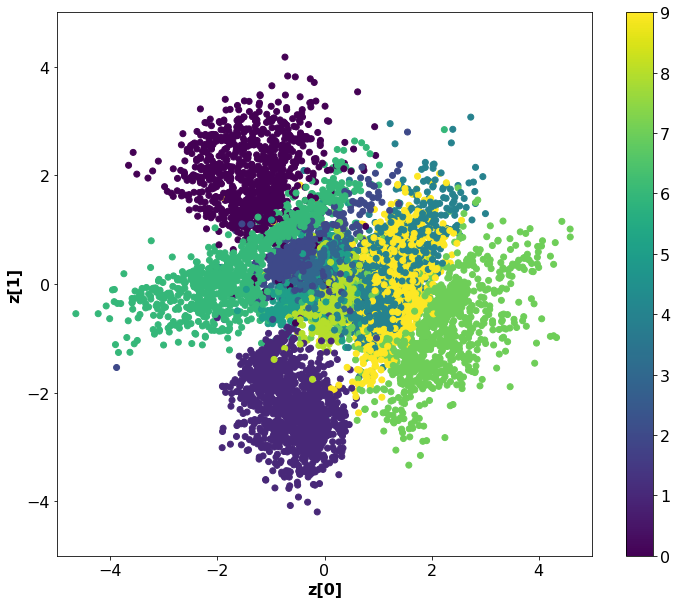

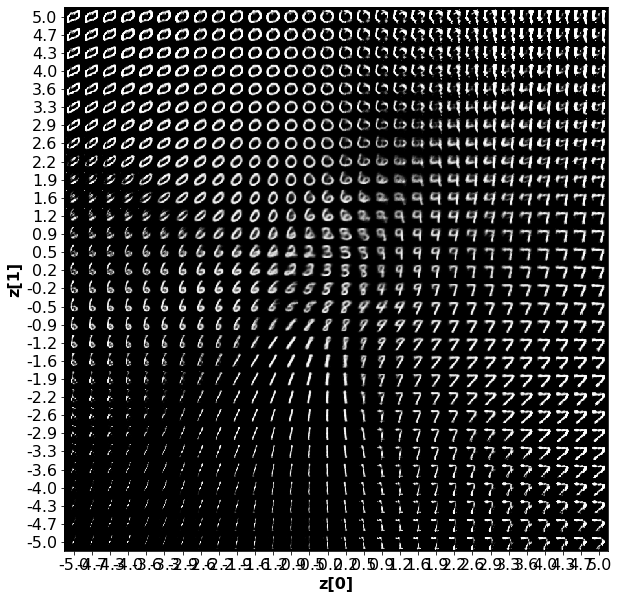

In [6]:
plot_results(models,
             data,
             batch_size=batch_size)

### Generate a random image

- We can sample a single random digit from out latent space with the code below:

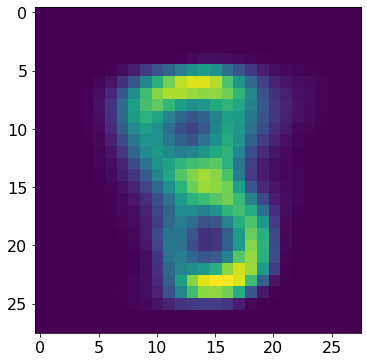

In [7]:
xi = np.random.normal()
yi = np.random.normal()
digit_size = 28
z_sample = np.array([[xi, yi]])
x_decoded = decoder.predict(z_sample)
digit = x_decoded[0].reshape(digit_size, digit_size)
plt.imshow(digit);

### Generate a random image of a specific digit

- But we may want to generate a new image of a *particular* digit
- One way we could do this is to check where particular digits occur in our latent space and then sample around this location
- Let's find the mean and standard deviation of each different digit in the latent space

In [8]:
z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
digit_means = np.zeros(shape=(10, latent_dim))
for i in range(10):
    digit_means[i, :] = z_mean[y_test == i, :].mean(axis=0)
digit_space = pd.DataFrame(digit_means,
                           columns=[f"z{_}_mean" for _ in range(latent_dim)])
digit_space

,z0_mean,z1_mean
0,-1.272349,1.890896
1,-0.616158,-2.195243
2,-0.440682,0.492715
3,0.000819,0.263851
4,1.225856,0.106953
5,-0.080385,0.000388
6,-1.375379,0.426333
7,1.930175,-0.736539
8,0.183215,-0.108753
9,1.309446,-0.066493


- Now we can use the code below to sample around a particular digit

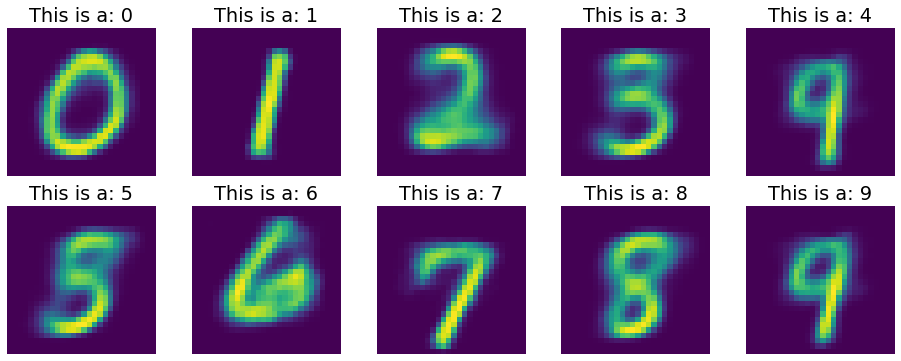

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6))
digit_size = 28
j = 0
for i in range(ax.size):
    xi = digit_space.loc[i, 'z0_mean']
    yi = digit_space.loc[i, 'z1_mean']
    z_sample = np.array([[xi, yi]])
    x_decoded = decoder.predict(z_sample)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    ax[i//5, i-(5*(i//5))].imshow(digit)
    ax[i//5, i-(5*(i//5))].set_title(f"This is a: {i}")
    ax[i//5, i-(5*(i//5))].axis('off')

### Generate a random image by interpolating between specific digits

- One of the coolest things we can do is generate images by interpolating between locations in the latent space
- Let's see what we can come up with by itnerpolating between a 0 and a 5 using the code below

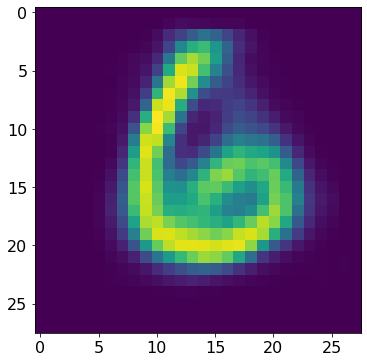

In [10]:
int_dig = digit_space.loc[[0,5]].mean()
x_decoded = decoder.predict(np.array(int_dig)[None,:])
digit = x_decoded[0].reshape(digit_size, digit_size)
plt.imshow(digit);

## Using more latent dimensions

- One thing we can do to improve the performance and generative ability of our model is to increase the number of latent dimensions
- Of course, using more than 2-dimensions makes it hard to visualize the latent space, but that's not a big deal - we care about the images that can be generated from the space!
- Below I'll set up a model with an 8-dimensional latent space (this is the same code as above but "paraphrased" for brevity

In [11]:
# network parameters
latent_dim = 8
# build network
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [12]:
# load pre-trained weights
url = './checkpoints/vae_8L/vae_8L'
vae.load_weights(url);
models = (vae.get_layer('encoder'),
          vae.get_layer('decoder'))

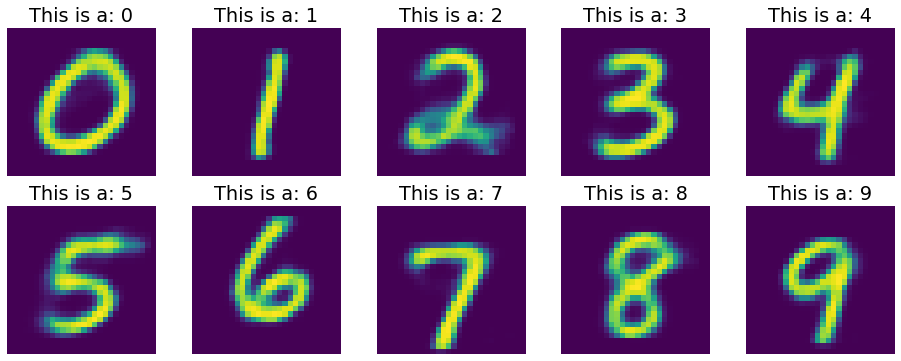

In [13]:
z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
digit_means = np.zeros(shape=(10,8))
for i in range(10):
    digit_means[i,:] = z_mean[y_test == i, :].mean(axis=0)
digit_space = pd.DataFrame(digit_means,
                           columns=[f'z{_}' for _ in range(8)])

fig, ax = plt.subplots(2, 5, figsize=(16, 6))
digit_size = 28
j = 0
for i in range(ax.size):
    xi = digit_space.loc[i]
    yi = digit_space.loc[i]
    z_sample = np.array([[xi, yi]])
    x_decoded = decoder.predict(np.squeeze(z_sample))
    digit = x_decoded[0].reshape(digit_size, digit_size)
    ax[i//5, i-(5*(i//5))].imshow(digit)
    ax[i//5, i-(5*(i//5))].set_title(f"This is a: {i}")
    ax[i//5, i-(5*(i//5))].axis('off')

- Wow! The images are much clearer now - we'd probably want to use this more complicated model to generate images in the future

- Okay not bad, but how can we improve our model?
    1. Increase the number of latent dimensions! We used 2 here for visualization purposes, but a higher number will potentially improve model accuracy (because we aren't reducing the dimensions all the way down to 2)
    2. Use convolutional layers! We are working with images after all, so convolutional layers will probably make our encoder/decoder more efficient
    3. Use conditional probabilities. Rather than manually sampling around a specific digit's latent space, we can encode the digit number into the model, and conditionally sample from it

## Improving the model

So how can we continue to improve our model?

1. Increase the number of latent dimensions! We already showed that this works but you probably want to tune this hyperparameter.
2. Vary the model architecture (add more hidden layers, vary the number of hidden nodes in each layer).
3. Use convolutional layers! We are working with images after all, so convolutional layers will probably make our encoder/decoder more efficient - we'll do this in the next section.

# Convolutional Variational Autoencoder (CVAE)

- Here we'll be using pretty much the same code as before but with convolutional layers in the encoder/decoder
- This should hopefully improve our model even further (but at the added cost of more hyperparameters to tune, i.e., the number of filters and kernel sizes)

## CVAE model set up

In [14]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 16
latent_dim = 2
epochs = 1

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for i in range(2):
    filters *= 2
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

# shape info needed to build decoder model
shape = K.int_shape(x)

# generate latent vector Q(z|X)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

for i in range(2):
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)
    filters //= 2

outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
cvae = Model(inputs, outputs, name='vae')

# build model
models = (encoder, decoder)
data = (x_test, y_test)

# VAE loss = mse_loss or xent_loss + kl_loss
# reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss = binary_crossentropy(K.flatten(inputs),
                                          K.flatten(outputs))

reconstruction_loss *= image_size * image_size
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
cvae_loss = K.mean(reconstruction_loss + kl_loss)
cvae.add_loss(cvae_loss)
cvae.compile(optimizer='rmsprop')
# vae.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_1[0][0]                   
____________________________________________________________________________________________

## Train the CVAE

- I've already trained the model and saved the weights of the model which we will load in the next cell
- But you can train the model from scratch if you like

In [15]:
# load pre-trained weights
url = './checkpoints/cvae_2L/cvae_2L'
cvae.load_weights(url);
models = (cvae.get_layer('encoder'),
          cvae.get_layer('decoder'))

# OR, fit from scratch
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# cvae.fit(x_train,
#          epochs=epochs,
#          batch_size=batch_size,
#          validation_data=(x_test, None),
#          callbacks=[early_stop])
# cvae.save_weights('./checkpoints/cvae_2L/cvae_2L')
# models = (cvae.get_layer('encoder'),
#           cvae.get_layer('decoder'))

## Visualize CVAE fit and results

- Here we'll repeat the same visualizations as previously with our hopefully new-and-improved CVAE model

### Visualize the latent space

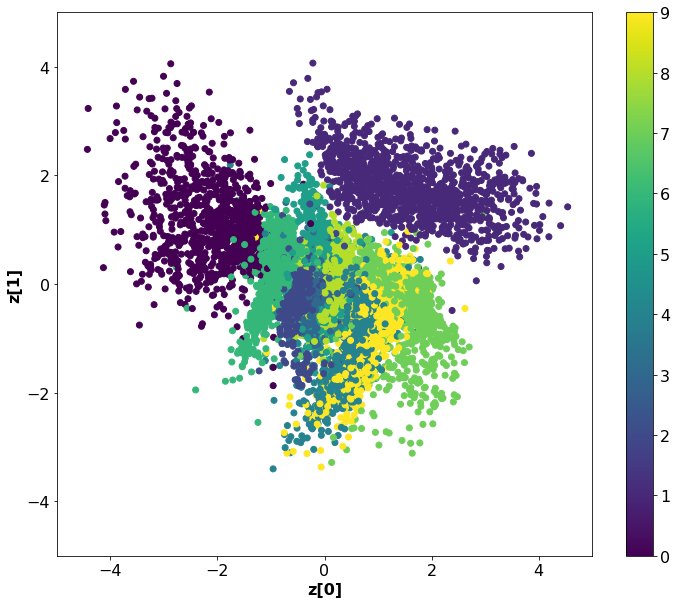

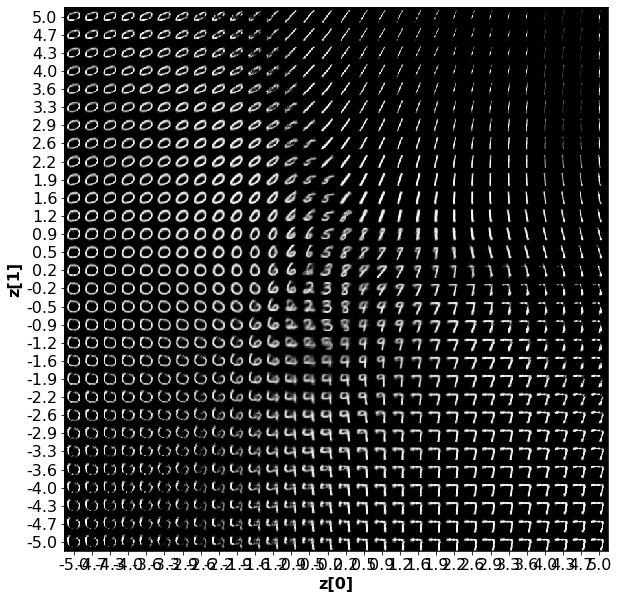

In [16]:
plot_results(models,
             data,
             batch_size=batch_size)

### Generate a random image

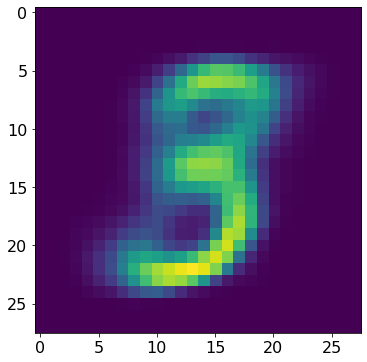

In [17]:
xi = np.random.normal()
yi = np.random.normal()
digit_size = 28
z_sample = np.array([[xi, yi]])
x_decoded = decoder.predict(z_sample)
digit = x_decoded[0].reshape(digit_size, digit_size)
plt.imshow(digit);

### Generate a random image of a specific digit

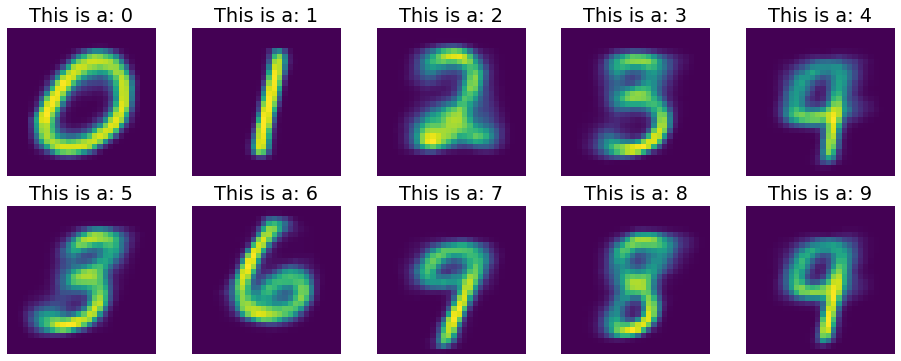

In [18]:
z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
digit_means = np.zeros(shape=(10, latent_dim))
for i in range(10):
    digit_means[i, :] = z_mean[y_test == i, :].mean(axis=0)
digit_space = pd.DataFrame(digit_means,
                           columns=[f"z{_}_mean" for _ in range(latent_dim)])

fig, ax = plt.subplots(2, 5, figsize=(16, 6))
digit_size = 28
j = 0
for i in range(ax.size):
    xi = digit_space.loc[i, 'z0_mean']
    yi = digit_space.loc[i, 'z1_mean']
    z_sample = np.array([[xi, yi]])
    x_decoded = decoder.predict(z_sample)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    ax[i//5, i-(5*(i//5))].imshow(digit)
    ax[i//5, i-(5*(i//5))].set_title(f"This is a: {i}")
    ax[i//5, i-(5*(i//5))].axis('off')

## Using more latent dimensions

- I've pre-trained an 8-dimensional CVAE model so let's see how it compares to the 2-dimensional case above

In [19]:
# network parameters
latent_dim = 8
# build network
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for i in range(2):
    filters *= 2
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)
shape = K.int_shape(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
for i in range(2):
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)
    filters //= 2
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)
decoder = Model(latent_inputs, outputs, name='decoder')
outputs = decoder(encoder(inputs)[2])
cvae = Model(inputs, outputs, name='vae')

In [20]:
# load pre-trained weights
url = './checkpoints/cvae_8L/cvae_8L'
cvae.load_weights(url);
models = (cvae.get_layer('encoder'),
          cvae.get_layer('decoder'))

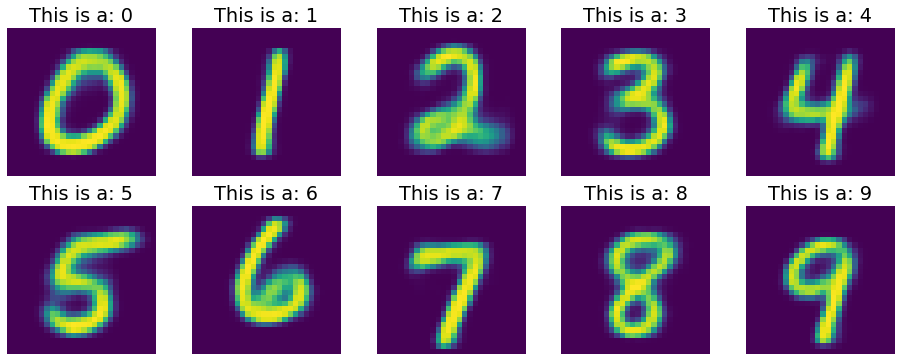

In [21]:
z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
digit_means = np.zeros(shape=(10,8))
for i in range(10):
    digit_means[i,:] = z_mean[y_test == i, :].mean(axis=0)
digit_space = pd.DataFrame(digit_means,
                           columns=[f'z{_}' for _ in range(8)])

fig, ax = plt.subplots(2, 5, figsize=(16, 6))
digit_size = 28
j = 0
for i in range(ax.size):
    xi = digit_space.loc[i]
    yi = digit_space.loc[i]
    z_sample = np.array([[xi, yi]])
    x_decoded = decoder.predict(np.squeeze(z_sample))
    digit = x_decoded[0].reshape(digit_size, digit_size)
    ax[i//5, i-(5*(i//5))].imshow(digit)
    ax[i//5, i-(5*(i//5))].set_title(f"This is a: {i}")
    ax[i//5, i-(5*(i//5))].axis('off')

- The convolutional version of our network seems to have done a bit better than the vanilla VAE!
- We could probably improve the performance of both by optimizing the hyperparameters/model architectures more

# Conditional Convolutional Autoencoder (CCVAE)

- VAEs can incorporate a conditional component, so that we can directly sample the latent space around a specified digit (rather than doing this kind of manually as we've done above)
- I haven't implemented one here but there are a few good examples online:
    - [ijdykeman.github.io](https://ijdykeman.github.io/ml/2016/12/21/cvae.html)
    - [wiseodd.github.io](https://wiseodd.github.io/techblog/2016/12/17/conditional-vae/)